In [1]:
import networkx as nx

In [ ]:
# create graph
G = nx.Graph()

In [ ]:
# add nodes
G.add_nodes_from([1,2,3,4])

# add edges 
G.add_edges_from([(1,2) ,(2,3), (3,4), (4,1)])

In [ ]:
print("Nodes:", G.nodes())
print("Edges:", G.edges())
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

Nodes: [1, 2, 3, 4]
Edges: [(1, 2), (1, 4), (2, 3), (3, 4)]
Number of nodes: 4
Number of edges: 4


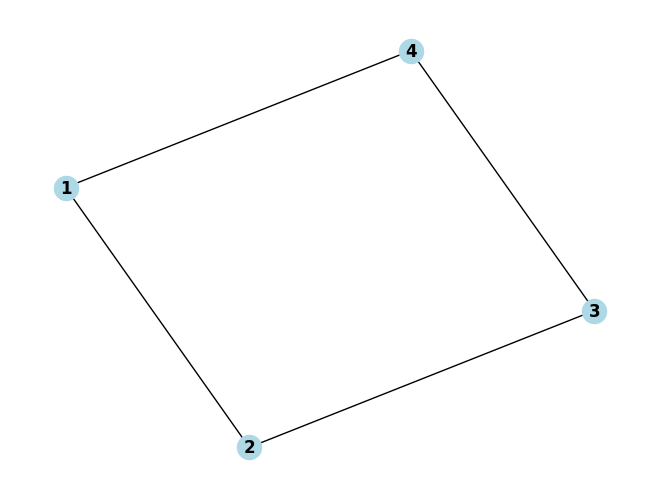

In [ ]:
# Draw graph
import matplotlib.pyplot as plt

nx.draw(G, with_labels=True, node_color='lightblue', font_weight='bold')
plt.show()

In [4]:
import importlib, vis.tracer, algorithms.BFS, vis.graph_viz, vis.registry
importlib.reload(vis.tracer)
importlib.reload(vis.graph_viz)
importlib.reload(vis.registry)
importlib.reload(algorithms.BFS)   # để BFS dùng lại get_tracer mới


<module 'algorithms.BFS' from 'd:\\OneDrive-ntdxl\\prj\\intro-ai-20251\\algorithms\\BFS.py'>

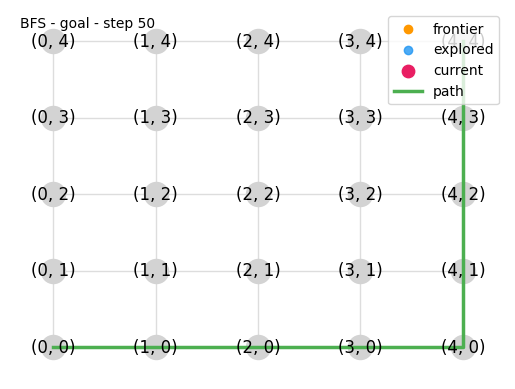

In [7]:
import networkx as nx
from vis.tracer import Tracer, Recorder, use_tracer
from vis import graph_viz
from vis.registry import get_renderer
from algorithms.BFS import bfs

G = nx.grid_graph(dim=[5,5])
# G = nx.Graph()
# G.add_nodes_from([1,2,3,4])
# G.add_edges_from([(1,2) ,(2,3), (3,4), (4,1)])
pos = {node: (node[0], node[1]) for node in G.nodes}
rec = Recorder()

algo = "BFS"
with use_tracer(Tracer(enabled=True, sink=rec)):
  result = bfs(G, (0,0), (4,4))
  # result = bfs(G, 1, 3)

renderer = get_renderer(algo)
anim = renderer(rec, G=G, pos=pos, interval=200)
from IPython.display import HTML
HTML(anim.to_jshtml())    



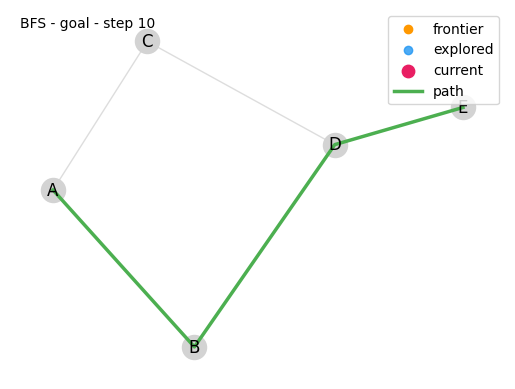

In [8]:
import networkx as nx

G = nx.Graph()
G.add_nodes_from(["A", "B", "C", "D", "E"])
G.add_weighted_edges_from([
    ("A", "B", 1),
    ("A", "C", 2),
    ("B", "D", 1),
    ("C", "D", 1),
    ("D", "E", 3),
])

# pos = {
#     "A": (0, 0),
#     "B": (1, 1.5),
#     "C": (1, -1.5),
#     "D": (3, 0),
#     "E": (5, 0),
# }

pos = nx.spring_layout(G, seed=0)

from vis.tracer import Tracer, Recorder, use_tracer
from algorithms.BFS import bfs

rec = Recorder()
with use_tracer(Tracer(enabled=True, sink=rec)):
    path, cost, visit_order = bfs(G, "A", "E")

from vis.registry import get_renderer
from IPython.display import HTML

renderer = get_renderer("BFS")  
anim = renderer(rec, G=G, pos=pos, interval=200)
HTML(anim.to_jshtml())



In [ ]:
# 3. analysis graph
print(dict(G.degree()))

# calculate shortest path
print(nx.shortest_path(G, source=1, target = 3))

# clustering
print(nx.clustering(G))

{1: 2, 2: 2, 3: 2, 4: 2}
[1, 2, 3]
{1: 0, 2: 0, 3: 0, 4: 0}


In [ ]:
# Đồ thị có hướng
DG = nx.DiGraph()
DG.add_weighted_edges_from([
    ('A', 'B', 3),
    ('B', 'C', 1),
    ('C', 'A', 2),
])

print(nx.dijkstra_path(DG, 'A', 'C'))  # A → B → C


['A', 'B', 'C']
